In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
import sys
import copy
import statsmodels.api as sm
pd.options.mode.chained_assignment = None
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 2000
%matplotlib inline

dfTemp=pd.read_csv(r'C:\Users\Jaesung Park\Desktop\FP\GroupProject\kc_house_data.csv',keep_default_na=False)

In [8]:

data= dfTemp

In [9]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('id')
data.price = data.price.astype(int)
data.bathrooms = data.bathrooms.astype(int)
data.floors = data.floors.astype(int)
data["house_age"] = data["date"].dt.year - data['yr_built']
data['renovated'] = data['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

data=data.drop('date', axis=1)
data=data.drop('yr_renovated', axis=1)
data=data.drop('yr_built', axis=1)

dataset = data[data.columns.difference(['id', 'long'])]
#X = dataset[['house_age','sqft_living','grade','condition', 
#'sqft_living15','bathrooms','view','sqft_basement','floors','waterfront',
#'renovated','bedrooms']]


In [10]:
dataset = dataset[~dataset.index.duplicated()] 

In [11]:
# mix the dataset
dataset = dataset.reindex(np.random.permutation(dataset.index))

five = [] # 1빼고 다 넣은 리스트
for i in range(len(dataset.columns)):
    if dataset.columns[i] not in (['bedrooms']):
        five.append(dataset.columns[i])
        
fifthteen = [] # 2빼고 다 넣은 리스트
for i in range(len(dataset.columns)):
    if dataset.columns[i] not in (['bedrooms','view']):
        fifthteen.append(dataset.columns[i])

thirty = [] # 4빼고 다 넣은 리스트
for i in range(len(dataset.columns)):
    if dataset.columns[i] not in (['bedrooms','view','grade','waterfront']):
        thirty.append(dataset.columns[i])    

half = [] # 반타작
for i in range(len(dataset.columns)):
    if dataset.columns[i] in (['price','bedrooms', 'sqft_living15','bathrooms', 'view',
       'grade', 'waterfront']):
        half.append(dataset.columns[i])
        
seventy = [] # 8 in
for i in range(len(dataset.columns)):
    if dataset.columns[i] in (['price','bedrooms', 'sqft_living15','bathrooms', 'view']):
        seventy.append(dataset.columns[i]) 
        
eightyfive = [] # 10 in
for i in range(len(dataset.columns)):
    if dataset.columns[i] in (['price','bedrooms', 'sqft_living15']):
        eightyfive.append(dataset.columns[i]) 
        
ninetyfive = [] # 11 in
for i in range(len(dataset.columns)):
    if dataset.columns[i] in (['price','bedrooms']):
        ninetyfive.append(dataset.columns[i]) 




In [16]:
testing = dataset
# linear Regression


In [17]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



<module 'matplotlib.pyplot' from 'c:\\users\\jaesung park\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

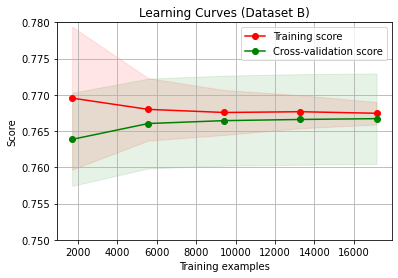

In [27]:
X = testing[testing.columns.difference(['price'])]
y = np.log(testing['price'])
estimator = LinearRegression(fit_intercept=True)
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
title = "Learning Curves (Dataset B)"
plot_learning_curve(estimator, title, X, y, ylim=(0.75, .78), cv=cv, n_jobs=1)